#### Loading the necessary  libraries to assist in Data analysis and Visualization

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

##### Load the data

In [110]:
df = pd.read_csv('causes-of-death.csv')
#how to connect django backend with mongodb?      
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


#### Step 1. understand the basic data.
      .Dataframe shape
      .head and Tail
      .describe

In [111]:
num_cols = df.columns.value_counts().sum()
num_rows = df.shape[0]

print(f" The dataframe has {num_rows} rows and {num_cols} columns")
# df.shape

 The dataframe has 10868 rows and 6 columns


In [112]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


#### Step 2. Data Preparation

###### We can drop irrelevant info
        - Identifying duplicated columns
        - Renaming columns

In [113]:
df.head(15)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2
6,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,3037,53.6
7,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,2078,53.2
8,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,608,61.9
9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,427,61.0


In [114]:
df.tail(15)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10853,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Oregon,260,7.3
10854,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Pennsylvania,2680,18.0
10855,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Rhode Island,111,9.0
10856,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,South Carolina,434,11.8
10857,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,South Dakota,97,10.8
10858,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Tennessee,675,12.3
10859,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Texas,1669,10.3
10860,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,United States,35525,13.0
10861,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Utah,135,9.1
10862,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,56,9.2


#### we need to rename 113 Cause Name and Cause name.
_- 113 Cause name to Cause Name_
_- Cause name to disease._
_- Remove all the rows with United states as state entry.(Because it is an aggregate Number for the Whole Country about a particular disease.)_

In [115]:
# Renaming the columns
df = df.rename(columns={'113 Cause Name':'Cause Name','Cause Name':'Diseases'})
df.head()

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [116]:
# Identifying missing Values
df.isna().sum()

Year                       0
Cause Name                 0
Diseases                   0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [117]:
# Identifying duplicated rows
df.duplicated().sum()

0

In [118]:
df.duplicated(subset=['State']).sum()

10816

In [119]:
df.loc[df.duplicated(subset=['State',])]

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
52,2017,All Causes,All causes,United States,2813503,731.9
53,2017,All Causes,All causes,Alabama,53238,917.7
54,2017,All Causes,All causes,Alaska,4411,708.8
55,2017,All Causes,All causes,Arizona,57758,678.5
56,2017,All Causes,All causes,Arkansas,32588,900.1
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [120]:
# Check the duplicated rows in columns
df.duplicated(subset=['Cause Name','Diseases']).sum()

10857

In [121]:
# Dropped Combined Cause of diseases in every state.
rows_to_drop=df.query('Diseases == "All causes"').index

df.loc[rows_to_drop]

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
52,2017,All Causes,All causes,United States,2813503,731.9
53,2017,All Causes,All causes,Alabama,53238,917.7
54,2017,All Causes,All causes,Alaska,4411,708.8
55,2017,All Causes,All causes,Arizona,57758,678.5
56,2017,All Causes,All causes,Arkansas,32588,900.1
...,...,...,...,...,...,...
10395,1999,All Causes,All causes,Virginia,55320,889.6
10396,1999,All Causes,All causes,Washington,43865,815.1
10397,1999,All Causes,All causes,West Virginia,21049,1012.3
10398,1999,All Causes,All causes,Wisconsin,46672,831.5


In [ ]:
df.drop(index=rows_to_drop, inplace=True)


In [50]:
df.loc[df.duplicated(subset=['State',])]

In [125]:
df.head(15)

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13840,33.2
6,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,3037,53.6
7,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,2078,53.2
8,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,608,61.9
9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,427,61.0
10,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,13059,56.1


In [143]:
alabam=df.query('State == "Alabama"').index

Alabam_data = df.loc[alabam]

Alabam_data.shape


(209, 6)

In [152]:
# With this data we can be able to tell the severe disease and most occuring among each state.
# Our example is Alabama.
Alabam_data = df.loc[alabam]
alabama =Alabam_data.reset_index(drop=True).sort_values('Deaths').reset_index(drop=True)
alabama

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
0,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,512,11.4
1,2002,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,514,11.5
2,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,521,11.4
3,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,535,11.5
4,2004,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,541,11.7
...,...,...,...,...,...,...
204,2013,All Causes,All causes,Alabama,50189,925.2
205,2014,All Causes,All causes,Alabama,50215,909.1
206,2015,All Causes,All causes,Alabama,51909,924.5
207,2016,All Causes,All causes,Alabama,52466,920.4


In [154]:
al_to_drop = alabama.query('Diseases == "All causes"').index
alabama.drop(index=al_to_drop,inplace=True)

In [156]:
alabama

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
0,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,512,11.4
1,2002,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,514,11.5
2,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,521,11.4
3,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,535,11.5
4,2004,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,541,11.7
...,...,...,...,...,...,...
185,2003,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13150,288.5
186,2002,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13197,291.3
187,2001,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13207,292.7
188,2000,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13406,299.5


In [168]:
dis_2001 = alabama.query('Year== 2001').index
dis_plot=alabama.loc[dis_2001]

Text(0, 0.5, 'Death Count')

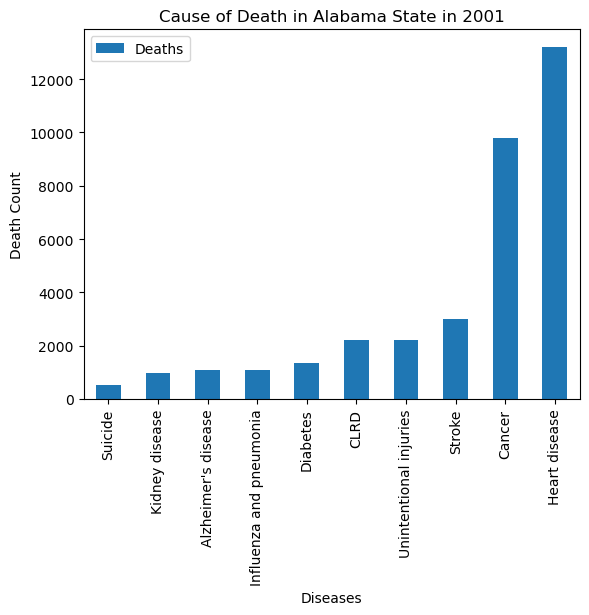

In [173]:
ax = dis_plot.plot(kind="bar",x='Diseases',y='Deaths',title="Cause of Death in Alabama State in 2001")

ax.set_ylabel("Death Count")

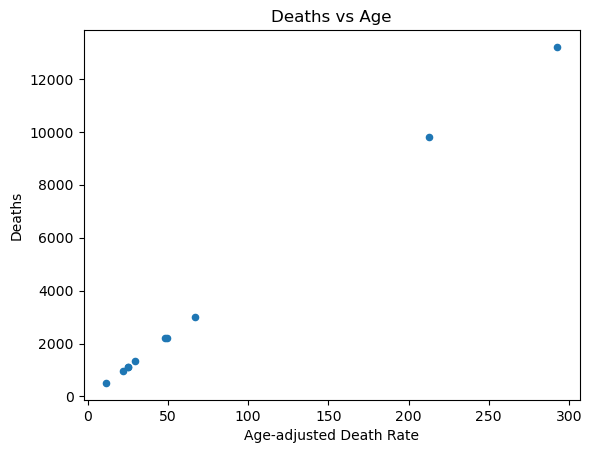

In [176]:
dis_plot.plot(kind='scatter',
              x='Age-adjusted Death Rate',
              y='Deaths',
              title='Deaths vs Age')
plt.show()

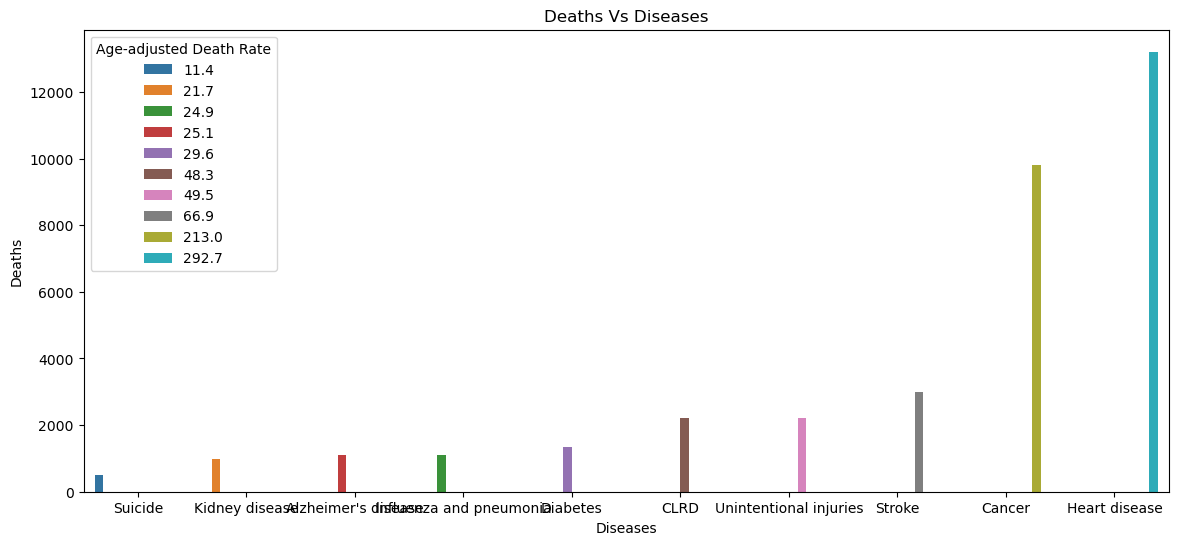

In [187]:
ax = plt.figure(figsize=(14,6))
ax = sns.barplot(
    x='Diseases',
    y='Deaths',
    hue='Age-adjusted Death Rate',
    data = dis_plot
)
ax.set_title('Deaths Vs Diseases')
plt.show()

In [188]:
alabama

,Year,Cause Name,Diseases,State,Deaths,Age-adjusted Death Rate
0,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,512,11.4
1,2002,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,514,11.5
2,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,521,11.4
3,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,535,11.5
4,2004,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,Alabama,541,11.7
...,...,...,...,...,...,...
185,2003,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13150,288.5
186,2002,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13197,291.3
187,2001,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13207,292.7
188,2000,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,13406,299.5


In [189]:
al_corr = alabama[[
    'Year','Diseases','Deaths','Age-adjusted Death Rate'
]].dropna().corr()

<AxesSubplot:>

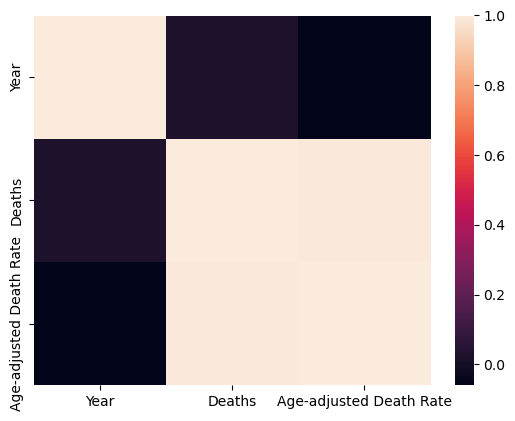

In [190]:
sns.heatmap(
    al_corr
)